In [36]:
import matplotlib.pyplot as plt
import numpy as np
import healpy as hp
from astropy.io import fits
from astropy.utils.data import get_pkg_data_filename
import functions_Ana as af
import functions_harper as hf
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [37]:
#resolution
NSIDE = 512
npix = hp.nside2npix(NSIDE)

raw_data =[hp.read_map('../CMB_maps/LFI_SkyMap_030_1024_R2.01_full.fits'),
        hp.read_map('../CMB_maps/LFI_SkyMap_044_1024_R2.01_full.fits'), 
        hp.read_map('../CMB_maps/LFI_SkyMap_070_1024_R2.01_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_100_2048_R2.02_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_143_2048_R2.02_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_217_2048_R2.02_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_353_2048_R2.02_full.fits'),
        hp.read_map('../CMB_maps/HFI_SkyMap_545_2048_R2.02_full.fits')*0.00010958025,
        hp.read_map('../CMB_maps/HFI_SkyMap_857_2048_R2.02_full.fits')*0.00004431631]
maps =[]
for i in range(9):
    maps.append(hp.pixelfunc.ud_grade(raw_data[i], NSIDE, order_in='RING'))
    
freq = [30,44,70,100,143,217,353,545,857]

conv_factors = [0.0032548074,0.0015916707 ,0.00069120334,0.00026120163, 0.00010958025,0.00004431631]

NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 1024
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING
NSIDE = 2048
ORDERING = NESTED in fits file
INDXSCHM = IMPLICIT
Ordering converted to RING


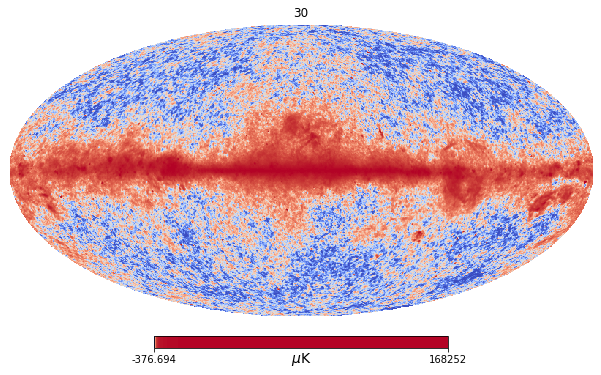

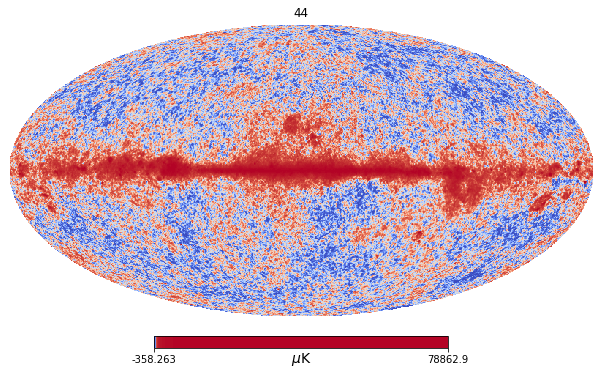

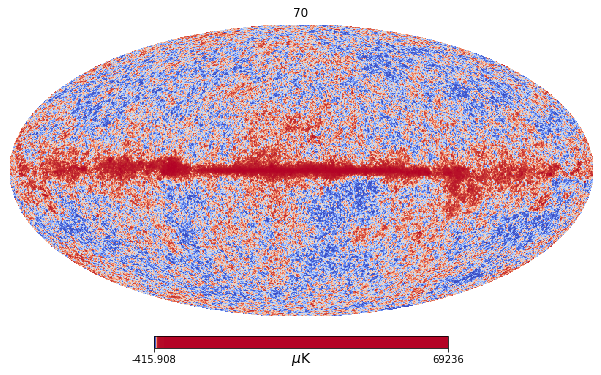

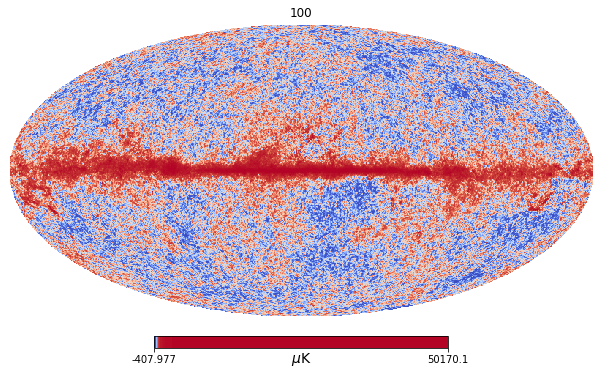

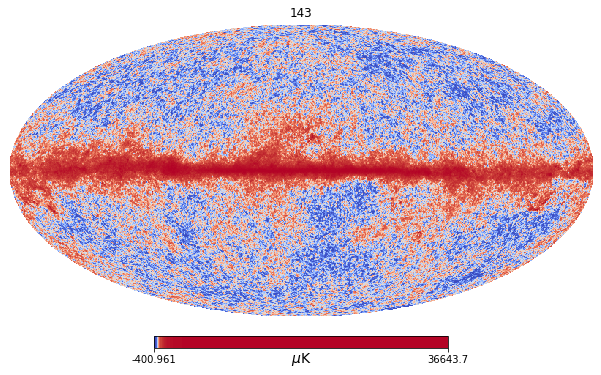

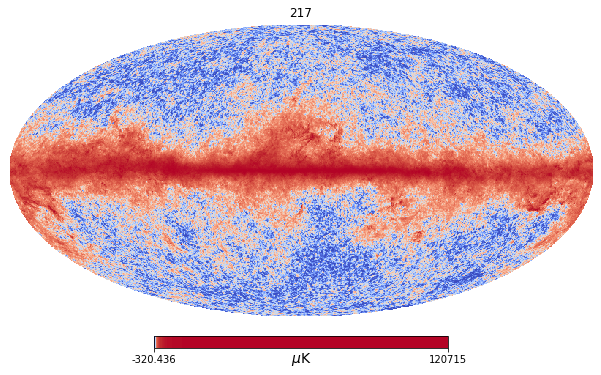

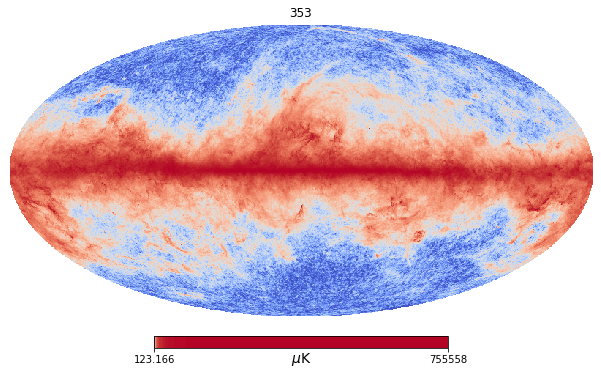

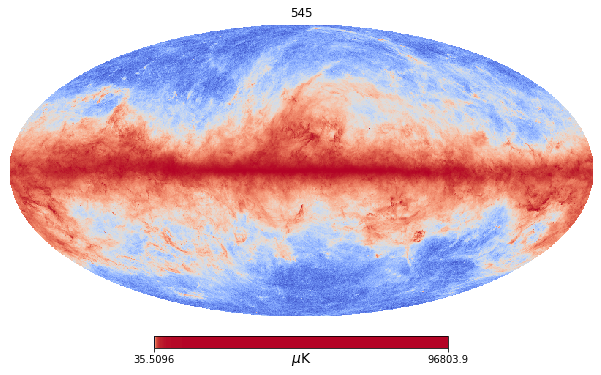

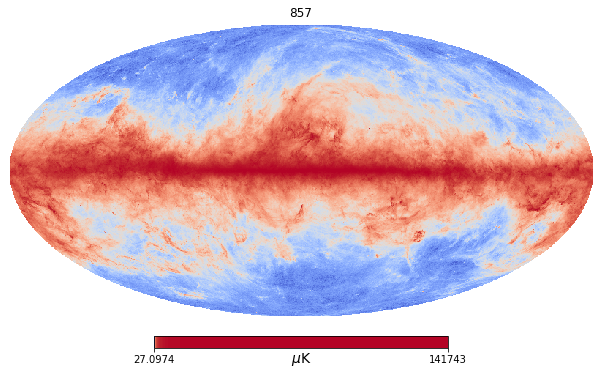

In [5]:
for i in range(9) :
    hp.mollview(maps[i]*1e6,norm = 'hist', title = str(freq[i]), unit = '$\mu$K', cmap ='coolwarm')

In [24]:
%autoreload
region= [[0.00001,0.00001],[2e-4,2e-4],[1e-6,1e-6]]
af.splitting(region, maps[3])

[-1.10295736e-04 -7.10144918e-05 -1.01454806e-05 ...  1.06400777e-04
  8.90308813e-05  1.02824678e-04]
[-1.6375e+30 -1.6375e+30 -1.6375e+30 ... -1.6375e+30 -1.6375e+30
 -1.6375e+30]
[-1.6375e+30 -1.6375e+30 -1.6375e+30 ... -1.6375e+30 -1.6375e+30
 -1.6375e+30]
Error: a pixel on a boundary was excluded or included in two or more regions, try changing the absolute tolerance


In [25]:
af.splitting(np.array([[-np.inf,0],[0,5],[5,np.inf]]), np.array([-3.0,-2.0,-1.0,0.0,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0]))

[-3. -2. -1.  0.  1.  2.  3.  4.  5.  6.  7.  8.]
[-3.0000e+00 -2.0000e+00 -1.0000e+00  0.0000e+00 -1.6375e+30 -1.6375e+30
 -1.6375e+30 -1.6375e+30 -1.6375e+30 -1.6375e+30 -1.6375e+30 -1.6375e+30]
[-1.6375e+30 -1.6375e+30 -1.6375e+30 -1.6375e+30 -1.6375e+30 -1.6375e+30
 -1.6375e+30 -1.6375e+30 -1.6375e+30 -1.6375e+30 -1.6375e+30 -1.6375e+30]
Error: a pixel on a boundary was excluded or included in two or more regions, try changing the absolute tolerance


In [18]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [19]:
print(maps[3].shape)
bool_map = hp.pixelfunc.mask_bad(maps[3], badval=0.0001, rtol=2e-4, atol=1e-6)
maps[3][bool_map == True]

(3145728,)


array([9.92958868e-05, 1.00512877e-04, 9.92755183e-05, ...,
       1.00327783e-04, 1.00537102e-04, 1.00069916e-04])

In [26]:
np.histogram(map[0])

TypeError: 'type' object is not subscriptable

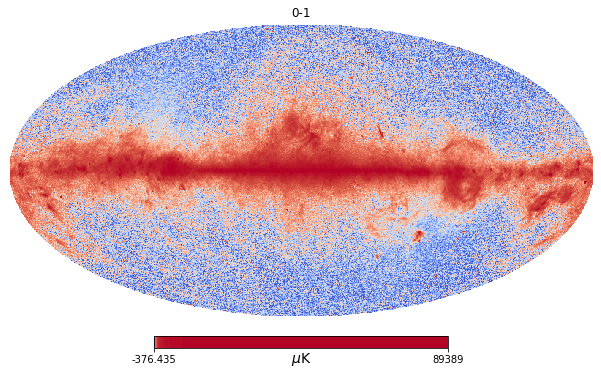

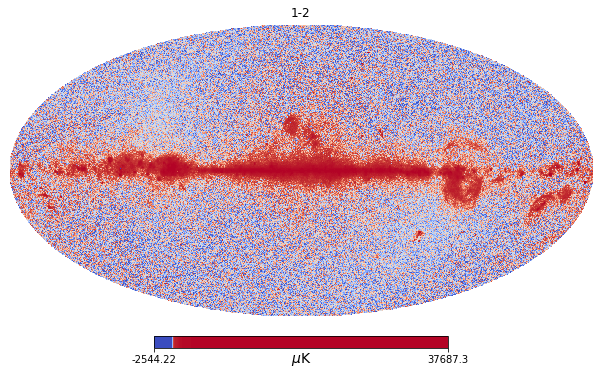

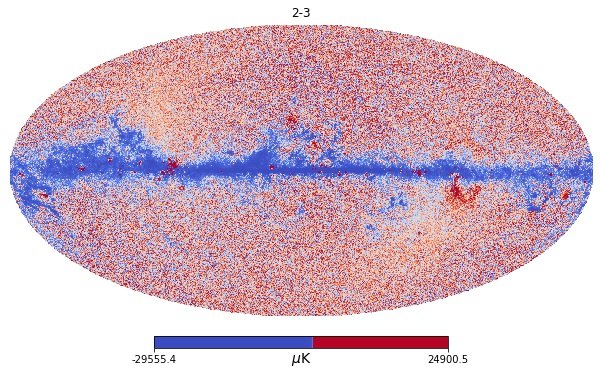

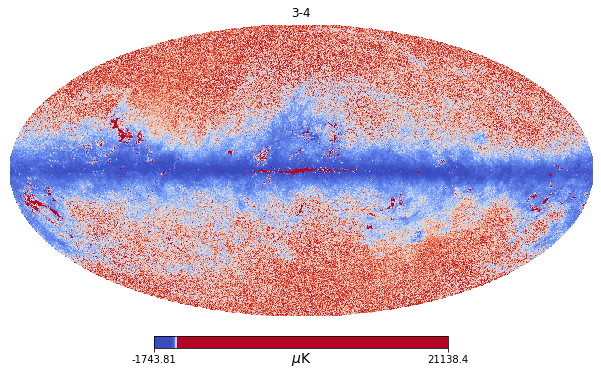

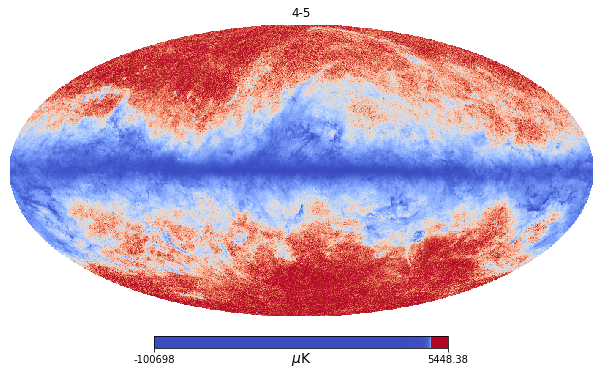

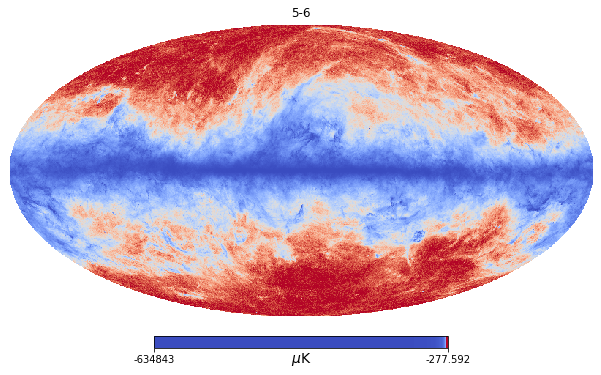

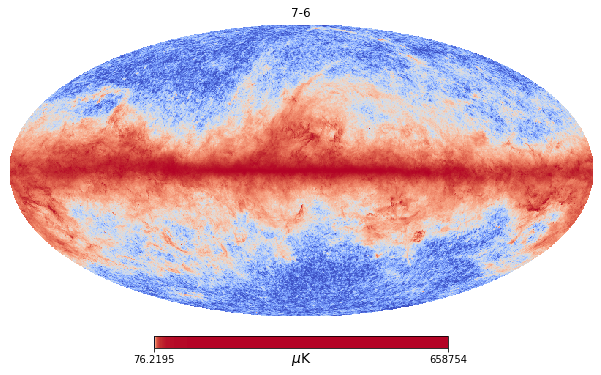

In [40]:
hp.mollview((maps[0]-maps[1])*1e6,norm = 'hist', title = "0-1", unit = '$\mu$K', cmap ='coolwarm')
hp.mollview((maps[1]-maps[2])*1e6,norm = 'hist', title = "1-2", unit = '$\mu$K', cmap ='coolwarm')
hp.mollview((maps[2]-maps[3])*1e6,norm = 'hist', title = "2-3", unit = '$\mu$K', cmap ='coolwarm')
hp.mollview((maps[3]-maps[4])*1e6,norm = 'hist', title = "3-4", unit = '$\mu$K', cmap ='coolwarm')
hp.mollview((maps[4]-maps[5])*1e6,norm = 'hist', title = "4-5", unit = '$\mu$K', cmap ='coolwarm')
hp.mollview((maps[5]-maps[6])*1e6,norm = 'hist', title = "5-6", unit = '$\mu$K', cmap ='coolwarm')
hp.mollview((maps[6]-maps[7])*1e6,norm = 'hist', title = "7-6", unit = '$\mu$K', cmap ='coolwarm')


In [43]:
diff_maps = []
for i in range(7):
    diff_maps.append(maps[i]-maps[i+1])

In [65]:
abs_diff_maps = np.abs(np.transpose(diff_maps))

junk_map = np.array([np.max(i) for i in abs_diff_maps])

the bin edges [2.72138676e+02 7.24799041e+02 1.93038953e+03 5.14129229e+03
 1.36930324e+04 3.64692624e+04 9.71302087e+04 2.58691205e+05
 6.88983793e+05 1.83500118e+06]


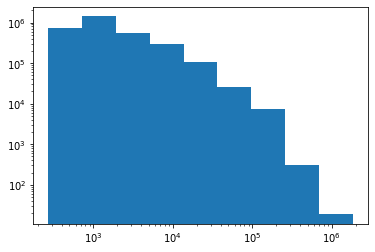

In [107]:
number_bins = 10
#finding the edges of our hist
hist,bins = np.histogram(junk_map*1e6, bins= number_bins)
low_edge = bins[0]
high_edge = bins[-1]

#plotting a log hist to find the regions
hist_log,bins_log = np.histogram(junk_map*1e6, bins = np.logspace(np.log10(low_edge),np.log10(high_edge), number_bins))
plt.hist(junk_map*1e6,bins=np.logspace(np.log10(low_edge),np.log10(high_edge),number_bins),log= True);
plt.semilogx()
print('the bin edges',bins_log)

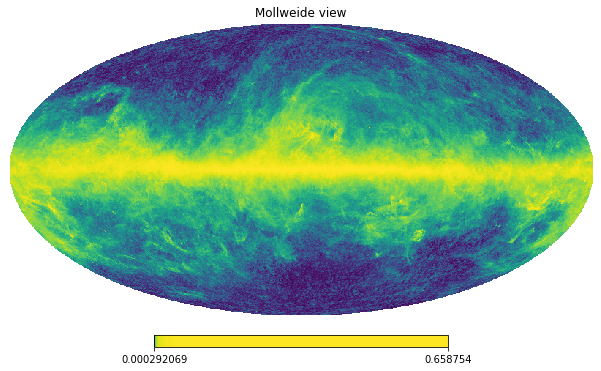

In [68]:
hp.mollview(junk_map,norm = 'hist')

In [93]:
hp.projaxes.MollweideAxes.hist2d((junk_map,junk_map),bins=10, range=None, normed= True)

/Users/anahoban/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  """Entry point for launching an IPython kernel.


TypeError: hist2d() missing 2 required positional arguments: 'x' and 'y'